In [2]:
# mounting the Google Drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [4]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import librosa
import librosa.display
import os
import tensorflow as tf

In [5]:
dataset_path = "/content/drive/My Drive/APS360 Group Project/data_testing/pure_augmentation/raw_3classes_13bands_5s/"

In [6]:
def generate_data_image(dataset_path):
  data_transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(128)])
  train_data = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path,'train'), transform=data_transform)
  test_data = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path,'test'), transform=data_transform)
  val_data = torchvision.datasets.ImageFolder(root=os.path.join(dataset_path,'validation'), transform=data_transform)

  return train_data, val_data, test_data

def visualize_image_data(dataset):
  batch = 27
  num_workers = 1

  data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, num_workers=num_workers, shuffle=True)

  # Visualize some sample data
  classes = ["mandarin", "india", "english"]

  # obtain one batch of training images
  dataiter = iter(data_loader)
  images, labels = dataiter.next()
  images = images.numpy() # convert images to numpy for display
  print(images.shape)
  # plot the images in the batch, along with the corresponding labels
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
      ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[idx], (1, 2, 0)))
      ax.set_title(classes[labels[idx]])
  return(images.shape)

# can also load in data as numpy arrays directly 
def numpy_loader(input):
    item = np.load(input)
    return item

def generate_data_numpy():
  data_transform = transforms.Compose([transforms.ToTensor()])
  data = torchvision.datasets.DatasetFolder(root='/content/drive/My Drive/APS360 Group Project/data_testing/pure_augmentation/raw_3classes_13bands_5s/', loader=numpy_loader,extensions='.npy',transform=data_transform)
  return data

def visualize_numpy_data(dataset):
    batch = 27
    num_workers = 1

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch, num_workers=num_workers, shuffle=True)

    # Visualize some sample data
    classes = ['mandarin', 'india', 'english']

    # obtain one batch of training images
    dataiter = iter(data_loader)
    array, labels = dataiter.next()
    array = array.numpy() # convert images to numpy for display
    plt.figure()
    librosa.display.specshow(array[0].reshape(128,128))
    plt.colorbar()

(27, 3, 128, 192)


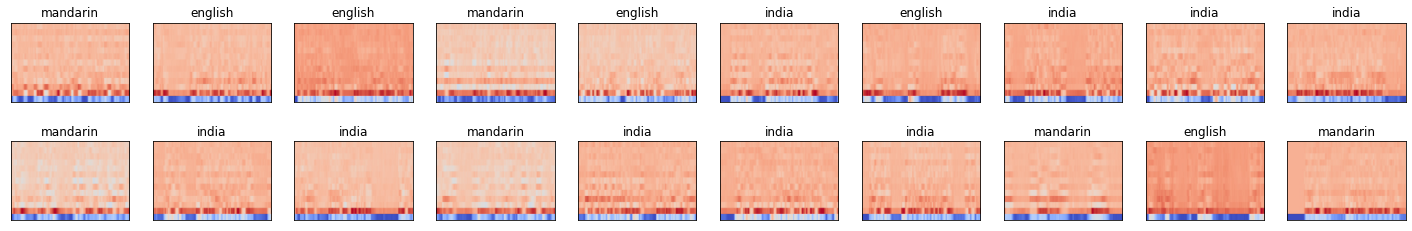

In [7]:
train_data, val_data, test_data= generate_data_image(dataset_path)
dims = visualize_image_data(train_data)

In [8]:
list_train = list(train_data)
list_val = list(val_data)
list_test = list(test_data)

In [9]:
new = []
for i in range(0, len(list_train)):
  temp = list(list_train[i])
  temp1 = temp[0].numpy()
  new.append(temp1)

data = np.array(new)
print(type(data))
print(data.shape)

new1 = []
for i in range(0, len(list_val)):
  temp = list(list_val[i])
  temp1 = temp[0].numpy()
  new1.append(temp1)

data1 = np.array(new1)
print(type(data1))
print(data1.shape)

new2 = []
for i in range(0, len(list_test)):
  temp = list(list_test[i])
  temp1 = temp[0].numpy()
  new2.append(temp1)

data2 = np.array(new2)
print(type(data2))
print(data2.shape)

<class 'numpy.ndarray'>
(944, 3, 128, 192)
<class 'numpy.ndarray'>
(345, 3, 128, 192)
<class 'numpy.ndarray'>
(304, 3, 128, 192)


In [10]:
batch = 940
batch1 = 340
batch2 = 300
num_workers = 1

data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch, num_workers=num_workers, shuffle=True)
data_loader1 = torch.utils.data.DataLoader(val_data, batch_size=batch1, num_workers=num_workers, shuffle=True)
data_loader2 = torch.utils.data.DataLoader(test_data, batch_size=batch2, num_workers=num_workers, shuffle=True)

# Visualize some sample data
classes = ['mandarin', 'india', 'english']

# obtain one batch of training images
dataiter = iter(data_loader)
array_train, labels_train = dataiter.next()
array_train = array_train.numpy()
labels_train = labels_train.numpy()

dataiter = iter(data_loader1)
array_val, labels_val = dataiter.next()
array_val = array_val.numpy()
labels_val = labels_val.numpy()

dataiter = iter(data_loader2)
array_test, labels_test = dataiter.next()
array_test = array_test.numpy()
labels_test = labels_test.numpy()

In [11]:
print(array_train.shape)
print(labels_train.shape)

print(array_val.shape)
print(labels_val.shape)

print(array_test.shape)
print(labels_test.shape)

(940, 3, 128, 192)
(940,)
(340, 3, 128, 192)
(340,)
(300, 3, 128, 192)
(300,)


In [12]:
train_list = []
for i in range(0,940):
  train_list.append([])
  for j in range(0,1):
    for k in range(0, 128):
      for h in range(0, 192):
        train_list[i].append(array_train[i][j][k][h])

val_list = []
for i in range(0,340):
  val_list.append([])
  for j in range(0,1):
    for k in range(0, 128):
      for h in range(0, 192):
        val_list[i].append(array_val[i][j][k][h])

test_list = []
for i in range(0,300):
  test_list.append([])
  for j in range(0,1):
    for k in range(0, 128):
      for h in range(0, 192):
        test_list[i].append(array_test[i][j][k][h])

In [13]:
train_list = np.array(train_list)
print(train_list.shape)

val_list = np.array(val_list)
print(val_list.shape)

test_list = np.array(test_list)
print(test_list.shape)

(940, 24576)
(340, 24576)
(300, 24576)


In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(new_array.shape[1]) ]
df = pd.DataFrame(new_array, columns = feat_cols)
df['y'] = labels
df['label'] = df ['y'].apply(lambda i: str(i))

#new_array, labels = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (900, 24578)


In [ ]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

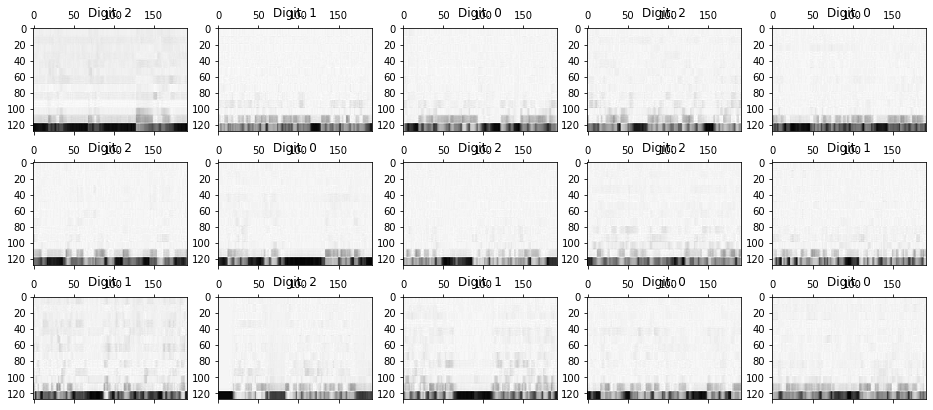

In [ ]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((128,192)).astype(float))
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15693332 0.0679616  0.05583809]


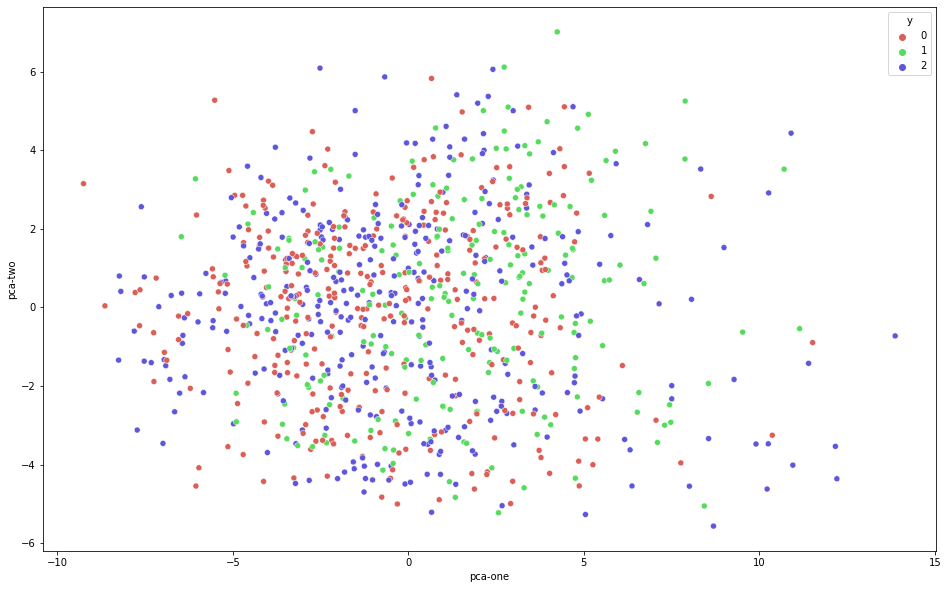

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df.loc[rndperm,:],
    legend="full"
)

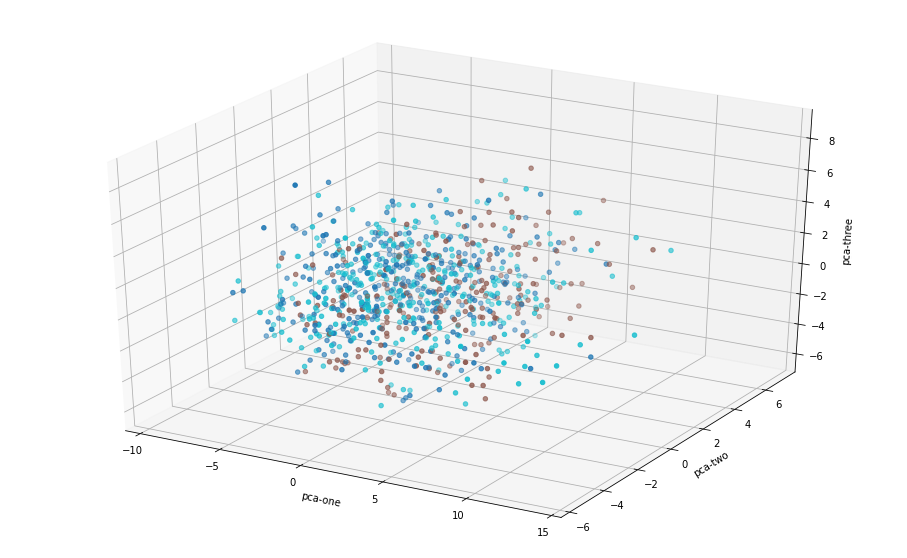

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
N = 900
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15693332 0.06796156 0.05583809]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 900 samples in 3.577s...
[t-SNE] Computed neighbors for 900 samples in 48.942s...
[t-SNE] Computed conditional probabilities for sample 900 / 900
[t-SNE] Mean sigma: 3.015029
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.313339
[t-SNE] KL divergence after 300 iterations: 1.855910
t-SNE done! Time elapsed: 55.45427894592285 seconds


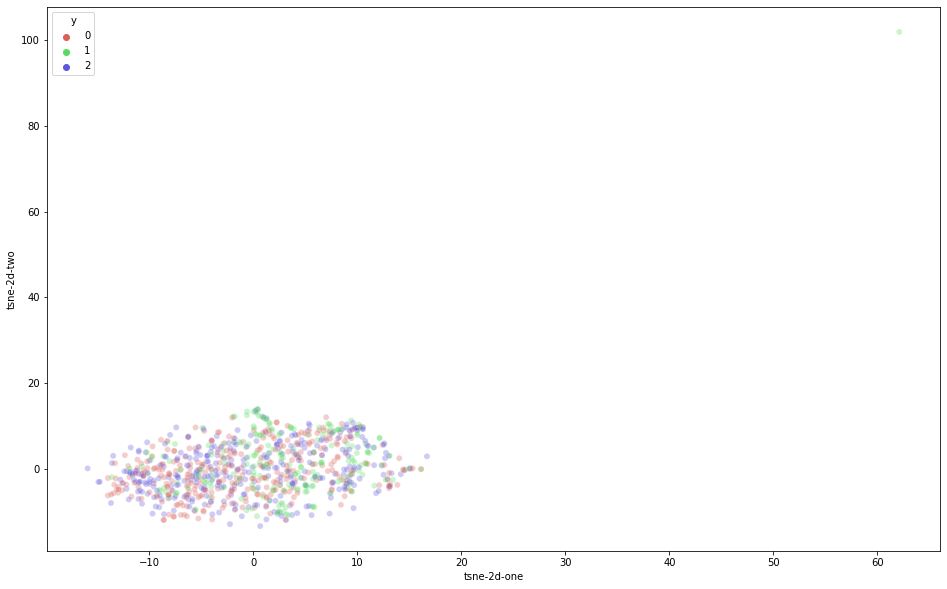

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3
)

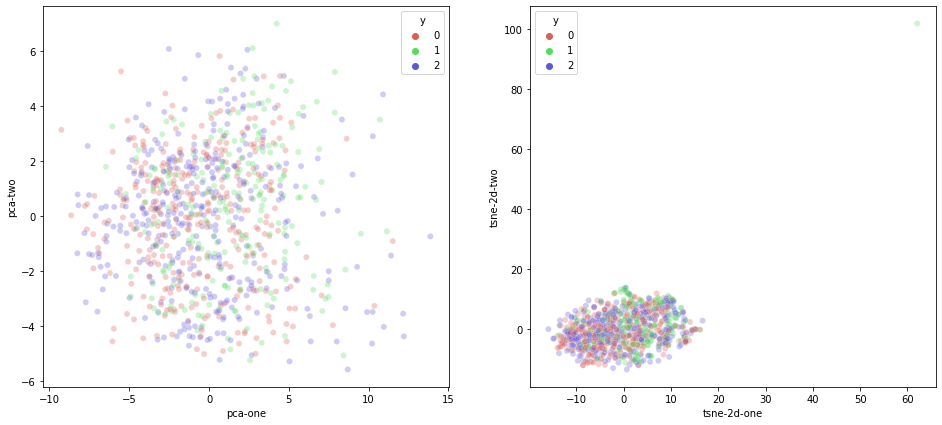

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.848303496837616


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 2.854043960571289 seconds


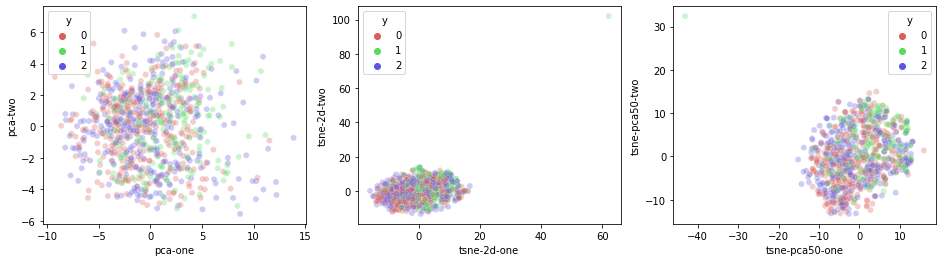

In [ ]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=3, perplexity=70, n_iter=500)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 900 samples in 3.421s...
[t-SNE] Computed neighbors for 900 samples in 48.889s...
[t-SNE] Computed conditional probabilities for sample 900 / 900
[t-SNE] Mean sigma: 3.260151
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 70.0235062, gradient norm = 0.1648698 (50 iterations in 2.264s)
[t-SNE] Iteration 100: error = 76.4957733, gradient norm = 0.1635882 (50 iterations in 2.102s)
[t-SNE] Iteration 150: error = 79.7150650, gradient norm = 0.1317315 (50 iterations in 1.950s)
[t-SNE] Iteration 200: error = 82.1462555, gradient norm = 0.1219043 (50 iterations in 2.345s)
[t-SNE] Iteration 250: error = 83.4053268, gradient norm = 0.1208671 (50 iterations in 2.256s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.405327
[t-SNE] Iteration 300: error = 2.5762248, gradient norm = 0.0008470 (50 iterations in 2.123s)
[t-SNE] Iteration 350: error = 2.2879872, gradient norm = 0.0003002

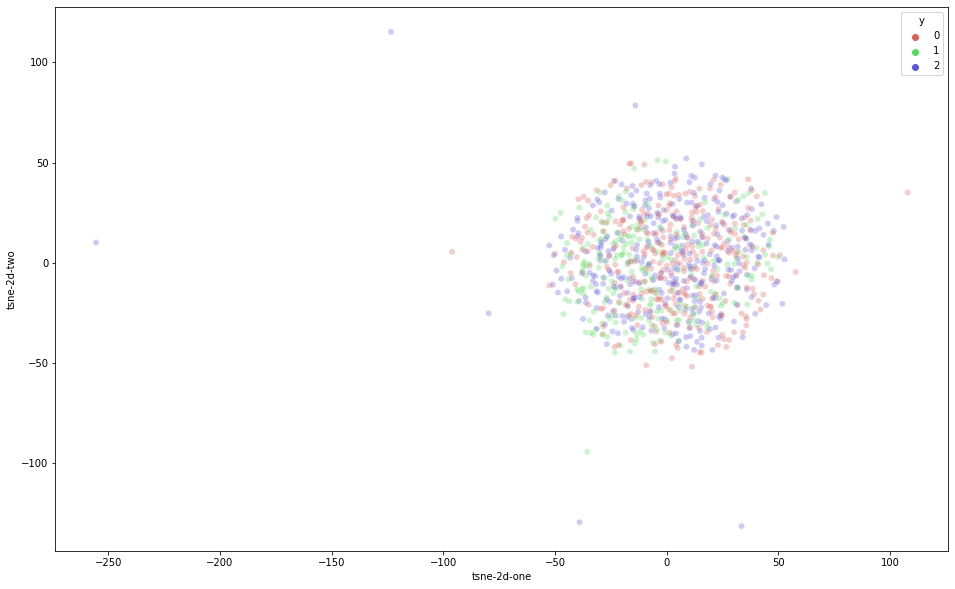

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [18]:

print(train_list.shape)

print(val_list.shape)

print(test_list.shape)

(940, 24576)
(340, 24576)
(300, 24576)


In [22]:
X_train = train_list
y_train = labels_train

X_val = val_list
y_val = labels_val

X_test = test_list
y_test = labels_test

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')

linear.fit(X_train, y_train)
rbf.fit(X_train, y_train)
poly.fit(X_train, y_train)
sig.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
from sklearn import metrics

y_pred_linear = linear.predict(X_test)
y_pred_rbf = rbf.predict(X_test)
y_pred_poly = poly.predict(X_test)
y_pred_sig = sig.predict(X_test)

print("Accuracy for linear: ", metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy for rbf: ", metrics.accuracy_score(y_test, y_pred_rbf))
print("Accuracy for poly: ", metrics.accuracy_score(y_test, y_pred_poly))
print("Accuracy for sig: ", metrics.accuracy_score(y_test, y_pred_sig))

Accuracy for linear:  0.38
Accuracy for rbf:  0.39666666666666667
Accuracy for poly:  0.36666666666666664
Accuracy for sig:  0.39666666666666667
